#Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load Dataset

In [ ]:
df = pd.read_csv('IRIS-2.csv')
print(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)
print(df['species'].value_counts())

(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


<ipython-input-6-4425bbb5bcc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='sepal_length', y='species', inner='stick', palette='Dark2')


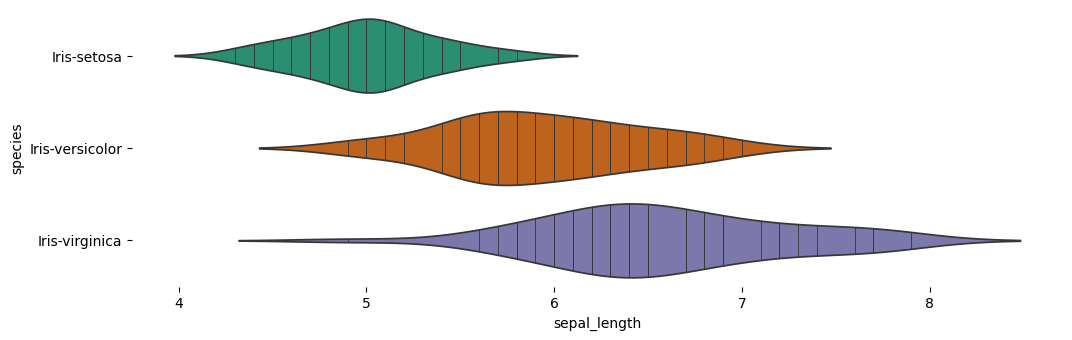

In [ ]:
figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sepal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

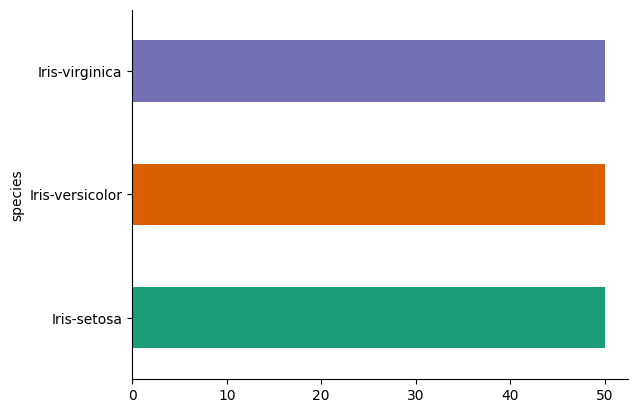

In [ ]:
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Data Preprocessing

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Trainig

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

#Testing & Evaluation

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#Prediction

In [ ]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

    predicted_species = model.predict(input_data)[0]

    return predicted_species

In [ ]:
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)

print(f"Predicted Species for given measurements: {predicted_species}")

Enter sepal length: 1.3
Enter sepal width: 2
Enter petal length: 2.3
Enter petal width: 1.2
Predicted Species for given measurements: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
